In [25]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_v1 = pd.read_csv("loan_prediction.csv")
dataset_v1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Understanding the datatypes of each variable
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Check for any null data
dataset_v1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# The below steps are performed to remove the null data from each of the above mentioned variables

dataset_v1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
dataset_v1.Gender = dataset_v1.Gender.fillna('Male')

In [9]:
dataset_v1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [40]:
dataset_v1.Married = dataset_v1.Married.replace('Married', 'Yes')

In [36]:
dataset_v1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [12]:
dataset_v1.Dependents = dataset_v1.Dependents.fillna(0)

In [13]:
dataset_v1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
dataset_v1.Self_Employed = dataset_v1.Self_Employed.fillna('No')

In [15]:
dataset_v1['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [16]:
dataset_v1.LoanAmount = dataset_v1.LoanAmount.fillna(120)

In [17]:
dataset_v1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
dataset_v1.Loan_Amount_Term = dataset_v1.Loan_Amount_Term.fillna(512)

In [21]:
dataset_v1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
dataset_v1.Credit_History = dataset_v1.Credit_History.fillna(1.0)

In [38]:
dataset_v1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have removed all the null data from the dataset

Text(0, 0.5, 'Number of individuals')

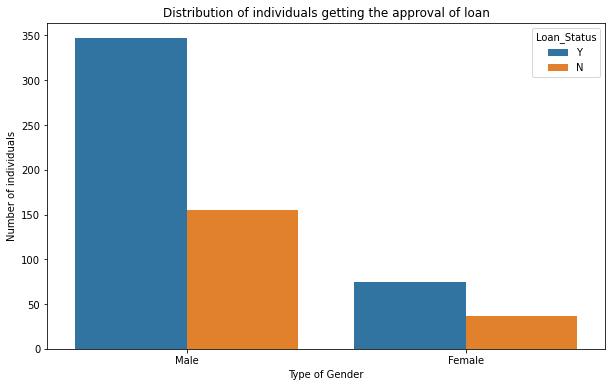

In [26]:
# Visualizing the different features in relation with the Target variable

plt.figure(figsize=(10,6))
sns.countplot('Gender', hue = 'Loan_Status', data = dataset_v1)
plt.title('Distribution of individuals getting the approval of loan')
plt.xlabel('Type of Gender')
plt.ylabel('Number of individuals')

from the above plot, majority of Male have applied for the loan compared with the Female. Also, their percentage of getting the approval of loan is higher than Female

Text(0, 0.5, 'Number of individuals')

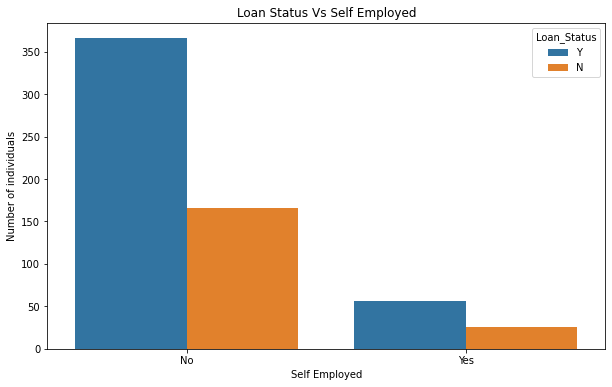

In [27]:
plt.figure(figsize=(10,6))
sns.countplot('Self_Employed', hue = 'Loan_Status', data = dataset_v1)
plt.title('Loan Status Vs Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Number of individuals')

- Less number of "Self Employed" individuals apply for the loan compared to "Salaried Employee"
- Percentage of conversion for "Salaried Empoyee" is higher than "Self Employed"

Text(0, 0.5, 'Number of individuals')

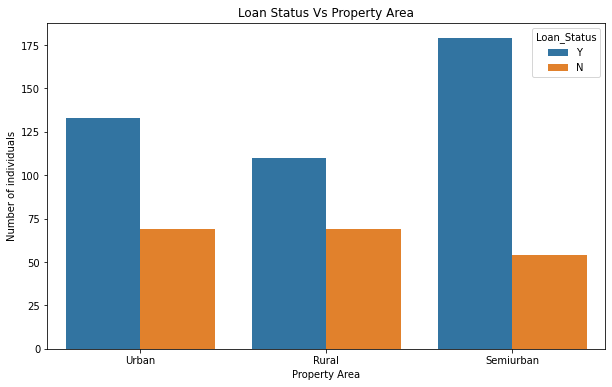

In [28]:
plt.figure(figsize=(10,6))
sns.countplot('Property_Area', hue = 'Loan_Status', data = dataset_v1)
plt.title('Loan Status Vs Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of individuals')

- Probability of getting the loan approval is higher in Semiurban Property
- Followed by Urban property, whereas, Rural has lower conversion rate

Text(0, 0.5, 'Number of individuals')

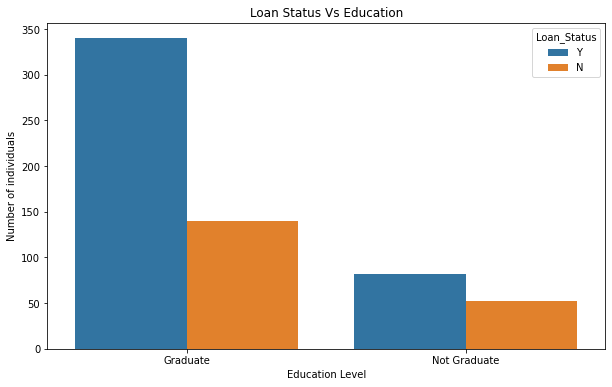

In [29]:
plt.figure(figsize=(10,6))
sns.countplot('Education', hue = 'Loan_Status', data = dataset_v1)
plt.title('Loan Status Vs Education')
plt.xlabel('Education Level')
plt.ylabel('Number of individuals')

Individuals who are graduate have higher chance of getting the loan approved than the applicants who are non-graduate at the time of applying for the loan

Text(0, 0.5, 'Number of applicants')

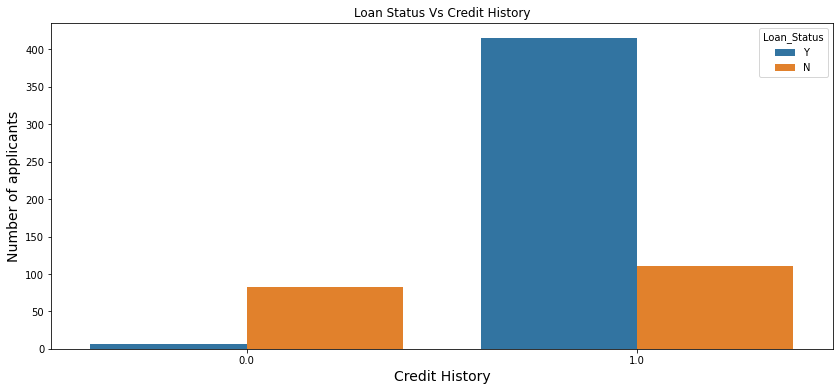

In [33]:
plt.figure(figsize=(14,6))
sns.countplot('Credit_History', hue = 'Loan_Status', data = dataset_v1)
plt.title('Loan Status Vs Credit History')
plt.xlabel('Credit History', fontsize = 14)
plt.ylabel('Number of applicants', fontsize = 14)

Text(0, 0.5, 'Number of individuals')

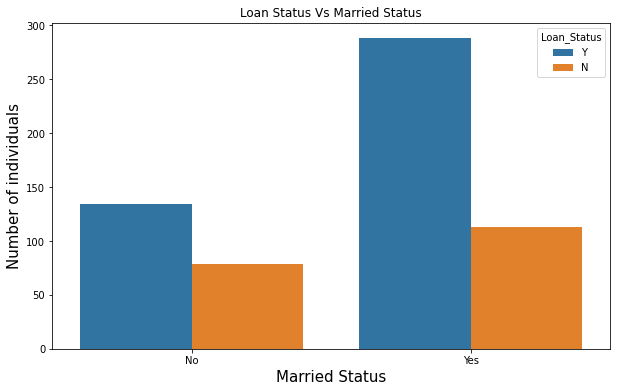

In [41]:
plt.figure(figsize=(10,6))
sns.countplot('Married', hue = 'Loan_Status', data = dataset_v1)
plt.title('Loan Status Vs Married Status')
plt.xlabel('Married Status', fontsize = 15)
plt.ylabel('Number of individuals', fontsize = 15)

The applicants who are married have higher chance of getting the loan amount approved than unmarried individuals

<AxesSubplot:>

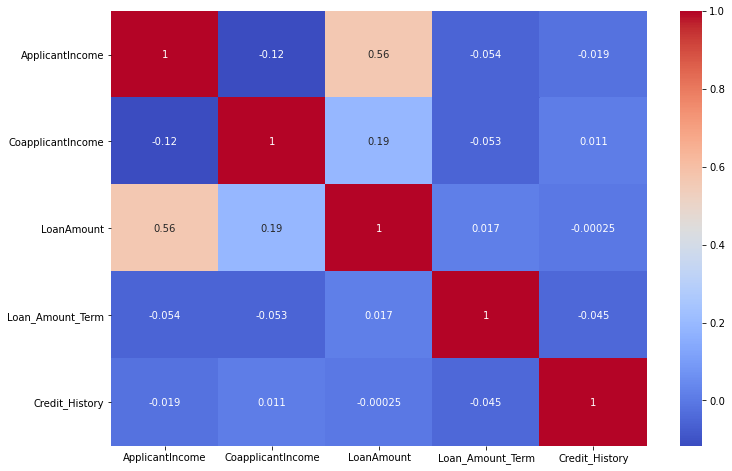

In [44]:
# Understanding the correlation between the avialable parameters using heatmap
correlation = dataset_v1.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

from the above heatmap, we can observe, the "LoanAmount" is directly proportional to "ApplicantIncome". Hence, the higher the applicant income, the more likely, he will be getting the loan sanctioned

In [45]:
# Preparing the feature and target variables
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can drop the "Loan_ID" - this variable is only for information and "Dependents" - Dependent is not mandatory creterion. Hence, we can remove this variables from the feature set

In [46]:
dataset_v2 = dataset_v1.copy()

In [73]:
## Preparing the features and target variable

X = dataset_v2.drop(columns = ['Loan_ID', 'Dependents', 'Loan_Status'], axis = 1)
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [74]:
X = pd.get_dummies(X)
dataset_v2['Loan_Status'].replace({'Y' : 1, 'N' : 0}, inplace = True)
y = dataset_v2['Loan_Status']

In [75]:
## Splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [76]:
# Performing Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_lr = log_reg.predict(X_test)

In [78]:
from sklearn import metrics
lr_acc_sr = print('Accuracy Score for Logistics Regression is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_lr) * 100))
lr_acc_sr

Accuracy Score for Logistics Regression is : 83.24%


In [80]:
# Using RandomForest Technique

from sklearn.ensemble import RandomForestClassifier

randomfor = RandomForestClassifier()
randomfor.fit(X_train,y_train)
predict_rfc = randomfor.predict(X_test)

In [82]:
rfc_acc_sr = print('Accuracy Score for RandomForest is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_rfc) * 100))
rfc_acc_sr

Accuracy Score for RandomForest is : 81.08%


In [85]:
# Using Decision Tree model

from sklearn import tree

decisiontr = tree.DecisionTreeClassifier()
decisiontr.fit(X_train, y_train)
predict_dt = decisiontr.predict(X_test)

In [87]:
dt_acc_sr = print('Accuracy Score for DecisionTree is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_dt) * 100))
dt_acc_sr

Accuracy Score for DecisionTree is : 65.95%


In [90]:
# Using KNN Classifier Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [93]:
knn_acc_sr = print('Accuracy Score for KNN Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_knn) * 100))
knn_acc_sr

Accuracy Score for KNN Classifier is : 63.24%


In [94]:
# Using SVM Model

from sklearn.svm import SVC

svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)
predict_svc = svc_classifier.predict(X_test)

In [96]:
svc_acc_sr = print('Accuracy Score for SVM is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_svc) * 100))
svc_acc_sr

Accuracy Score for SVM is : 81.62%


In [97]:
# Using Naive Bayes

from sklearn.naive_bayes import GaussianNB
naiveb_classifier = GaussianNB()
naiveb_classifier.fit(X_train, y_train)
predict_nb = naiveb_classifier.predict(X_test)

In [98]:
nb_acc_sr = print('Accuracy Score for Naive Bayes is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_nb) * 100))
nb_acc_sr

Accuracy Score for Naive Bayes is : 81.62%


### From all the above used models - **Logistic Regression** has highest accuracy score of **83.24 %**